# Machine Learning using Python 
# Exam – Paper 1
## Part I: Supervised Learning
## Problem Statements & Tasks:
### Q1. What does the primary analysis of several categorical features reveal?
### Q2. Perform the following Exploratory Data Analysis tasks:
#### a. Missing Value Analysis
#### b. Label Encoding wherever required
#### c. Selecting important features based on Random Forest
#### d. Handling unbalanced data using SMOTE
#### e. Standardize the data using the anyone of the scalers provided by sklearn.
### Q3. Build the following Supervised Learning models:
#### a. Logistic Regression
#### b. AdaBoost
#### c. Naïve Bayes
#### d. KNN
#### e. SVM
### Q4. Tabulate the performance metrics of all the above models and tell which model performs better in predicting if the client will subscribe to term deposit or not.

# Dataset Information:
## Column Description:
### Given is the ‘Portugal Bank Marketing’ dataset:
### Bank client data:
#### 1) age (numeric)
#### 2) job: type of job(categorical:"admin.","bluecollar","entrepreneur","housemaid","management","retired","selfemployed","services","student","technician","unemployed","unknown")
#### 3) marital: marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
#### 4) education: education of individual (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
#### 5) default: has credit in default? (categorical: "no","yes","unknown")
#### 6) housing: has housing loan? (categorical: "no","yes","unknown")
#### 7) loan: has personal loan? (categorical: "no","yes","unknown")
### Related with the last contact of the current campaign:
#### 8) contact: contact communication type (categorical: "cellular","telephone")
#### 9) month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")
#### 10) dayofweek: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
#### 11) duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
### Other attributes:
#### 12) campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
#### 13) pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
#### 14) previous: number of contacts performed before this campaign and for this client (numeric)
#### 15) poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
### Social and economic context attributes
#### 16) emp.var.rate: employment variation rate - quarterly indicator (numeric)
#### 17) cons.price.idx: consumer price index - monthly indicator (numeric)
#### 18) cons.conf.idx: consumer confidence index - monthly indicator (numeric)
#### 19) concavepoints_se: standard error for number of concave portions of the contour
# #The above column *concavepoints_se* is missing in the dataset.#
#### 20) euribor3m: euribor 3 month rate - daily indicator (numeric)
#### 21) nr.employed: number of employees - quarterly indicator (numeric)
### Output variable (desired target):
#### 22) y: has the client subscribed a term deposit? (binary: "yes","no")


# Importing Necessary Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
%matplotlib inline

# Importing the necessary Datasets:

In [2]:
# Importing the Dataset
df=pd.read_csv('bank.csv',sep=';')

In [3]:
# Checking Dataset
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
# Getting a sample of 10 rows from the dataset
df.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
35830,44,technician,married,professional.course,no,yes,no,cellular,may,fri,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.259,5099.1,no
20732,32,admin.,single,university.degree,unknown,yes,no,cellular,aug,wed,...,2,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
5494,48,admin.,single,university.degree,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
26077,38,services,married,high.school,no,yes,yes,cellular,nov,wed,...,3,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no
27233,33,admin.,single,university.degree,no,no,no,telephone,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no
11359,36,admin.,single,university.degree,no,yes,no,telephone,jun,thu,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no
1584,48,admin.,married,professional.course,unknown,yes,no,telephone,may,fri,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
37487,33,admin.,single,university.degree,no,yes,no,cellular,aug,thu,...,3,999,0,nonexistent,-2.9,92.201,-31.4,0.873,5076.2,no
29560,41,blue-collar,single,basic.4y,no,yes,no,cellular,apr,mon,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no
36362,34,technician,married,university.degree,no,yes,no,cellular,jun,tue,...,1,999,0,nonexistent,-2.9,92.963,-40.8,1.262,5076.2,yes


In [5]:
# Checking the Shape of Dataset
df.shape 

(41188, 21)

In [6]:
# Checking the spread of the dataset
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
# Checking the spread of all the columns of the dataset
df.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [8]:
# Checking for data correlation 
df.corr() 

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


In [9]:
# Getting detail on the feature of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

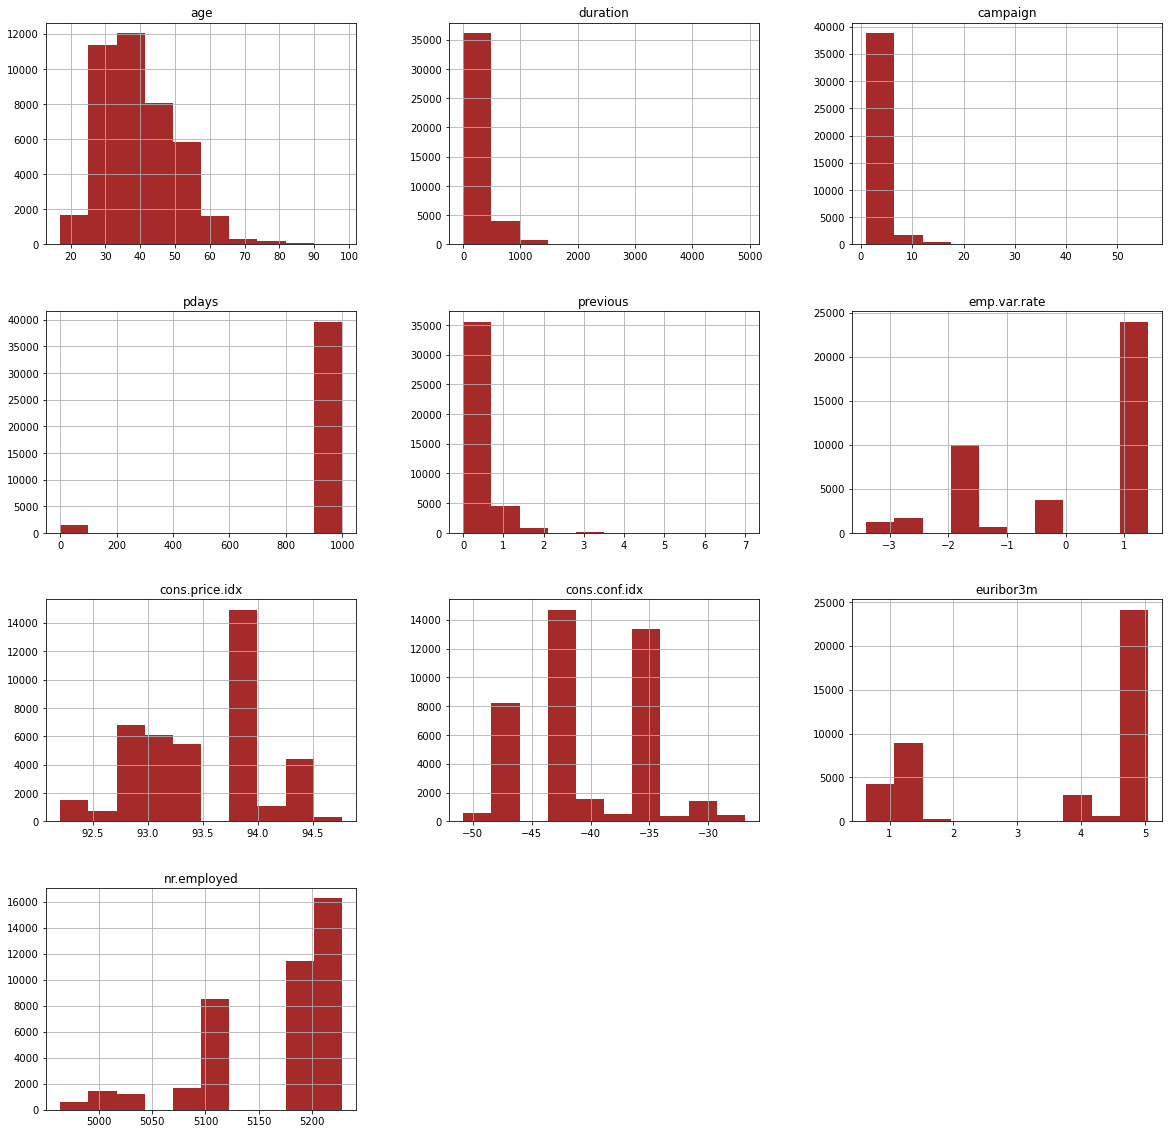

In [10]:
# Visualization of features to check the spread of data:
fig = df.hist(figsize = (20,20),color="brown")

<AxesSubplot:>

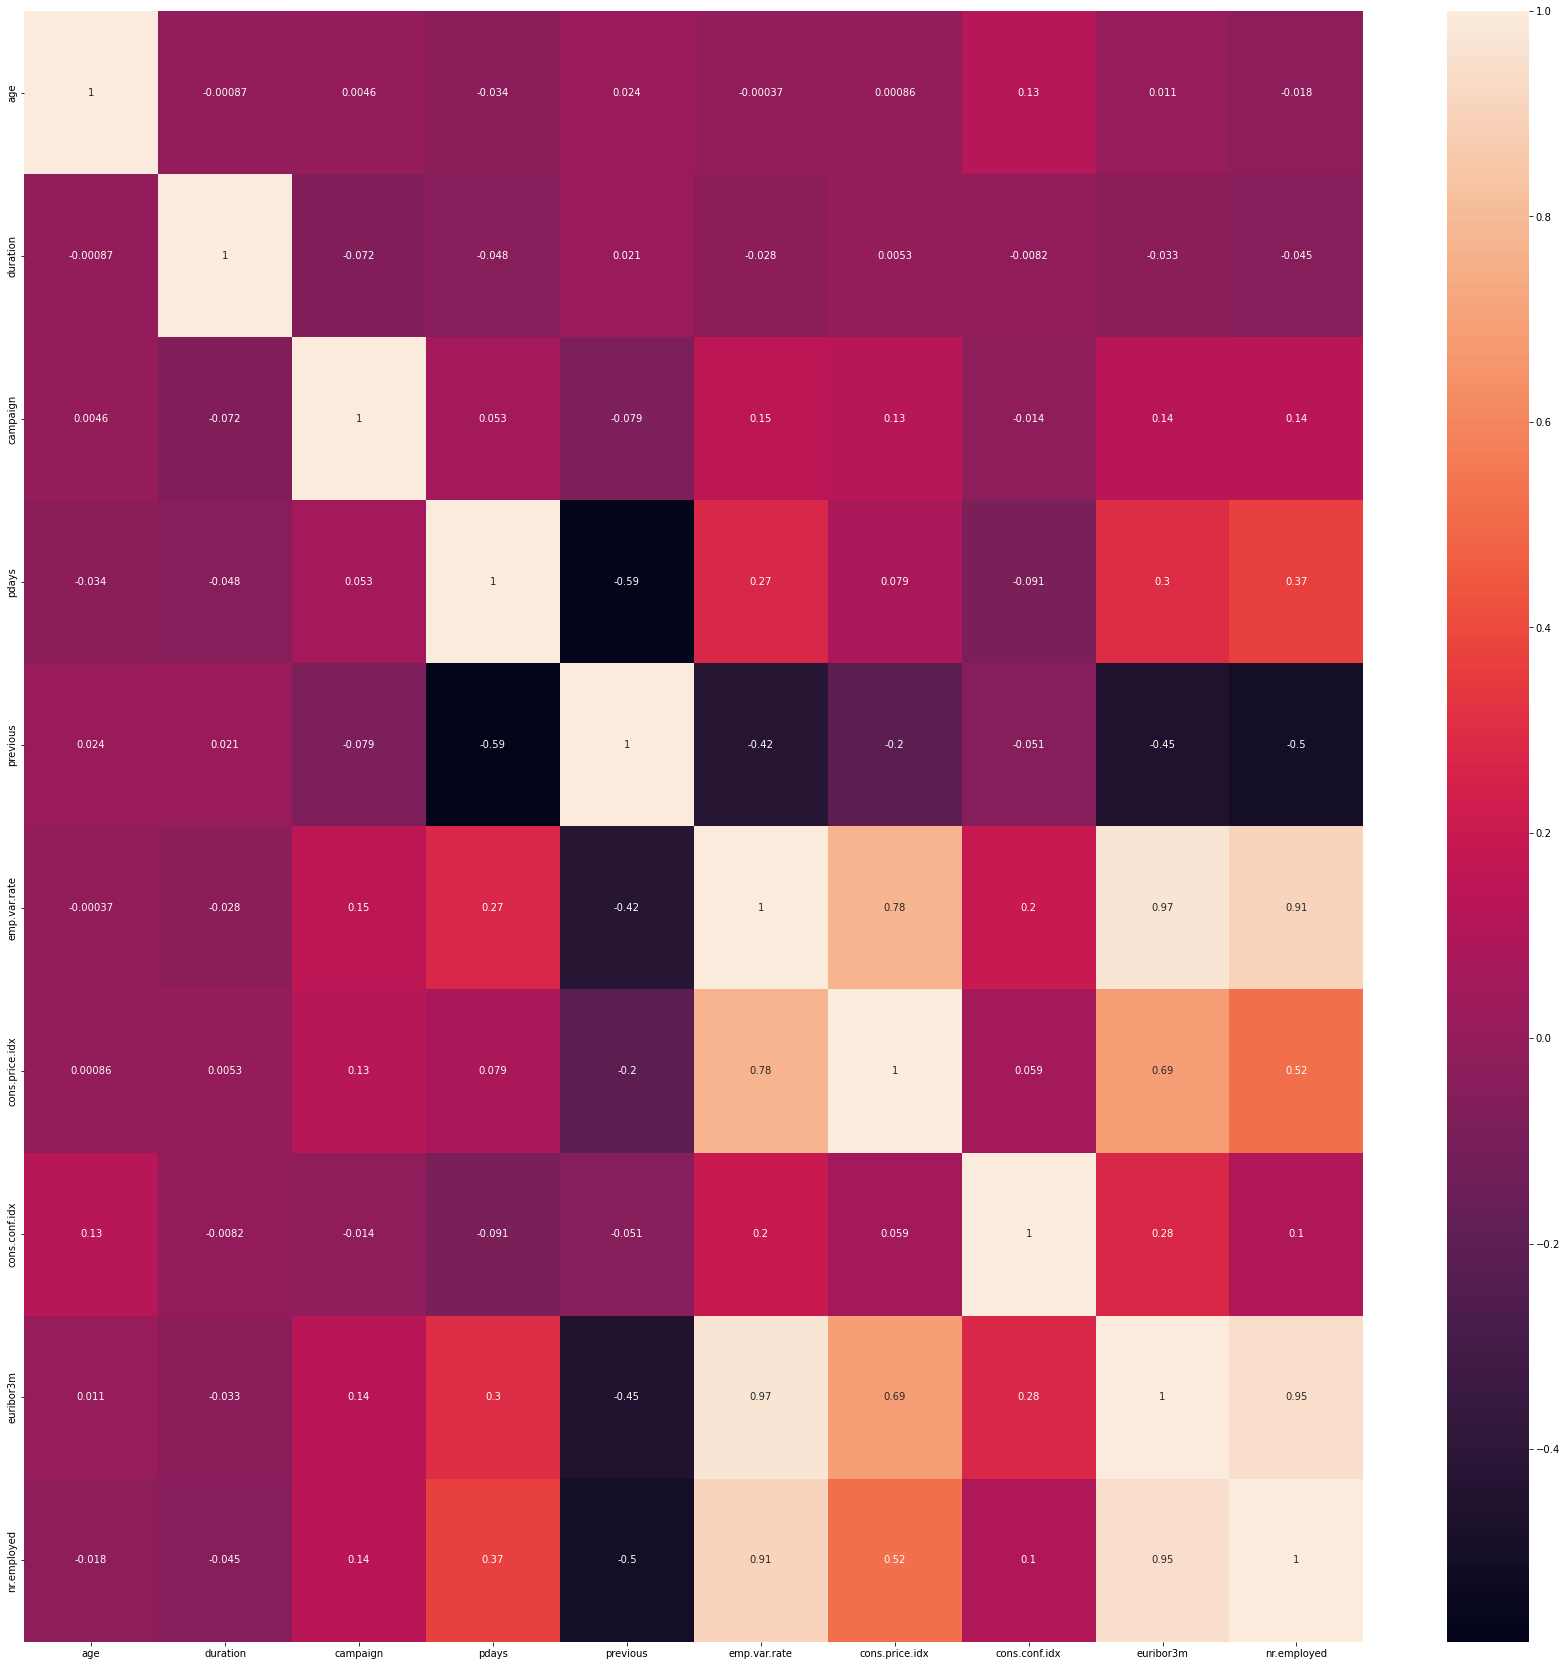

In [11]:
# Visualization of data correlation using heatmap
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True)

### The dataframe has a unique form of correlation.

# The format of Dataset is Understood

# Task Q1: What does the primary analysis of several categorical features reveal?

# Task Q2: Perform the following Exploratory Data Analysis tasks:

# Exploratory Data Analysis:

# Task Q2.a. Missing Value Analysis:

In [12]:
for i in df.columns:
    print(i,'=',df[i].isnull().sum(),df[i].dtype)

age = 0 int64
job = 0 object
marital = 0 object
education = 0 object
default = 0 object
housing = 0 object
loan = 0 object
contact = 0 object
month = 0 object
day_of_week = 0 object
duration = 0 int64
campaign = 0 int64
pdays = 0 int64
previous = 0 int64
poutcome = 0 object
emp.var.rate = 0 float64
cons.price.idx = 0 float64
cons.conf.idx = 0 float64
euribor3m = 0 float64
nr.employed = 0 float64
y = 0 object


<AxesSubplot:>

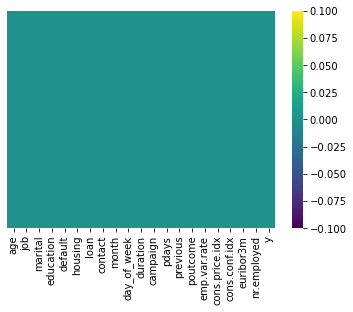

In [13]:
# Checking visually for missing values
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

## We can see that there are no missing values in the Dataset.

# Task Q2.b. Label Encoding wherever required

In [14]:
# Checking for unique values in catagorical feature/column
for col in df.columns:
    if df[col].dtype=='object':
        print(col,'=',df[col].nunique())

job = 12
marital = 4
education = 8
default = 3
housing = 3
loan = 3
contact = 2
month = 10
day_of_week = 5
poutcome = 3
y = 2


In [15]:
# Label Encoding on Catagorical columns:
df_encoded=df.copy()
lben=LabelEncoder()
for col in df_encoded.columns:
    if df_encoded[col].dtype=='object':
        df_encoded[col]=df_encoded[col].astype('category')
        df_encoded[col]=lben.fit_transform(df_encoded[col])
df_encoded.head()
# Encoding done.

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


# Lable Encoding is Done.

<AxesSubplot:>

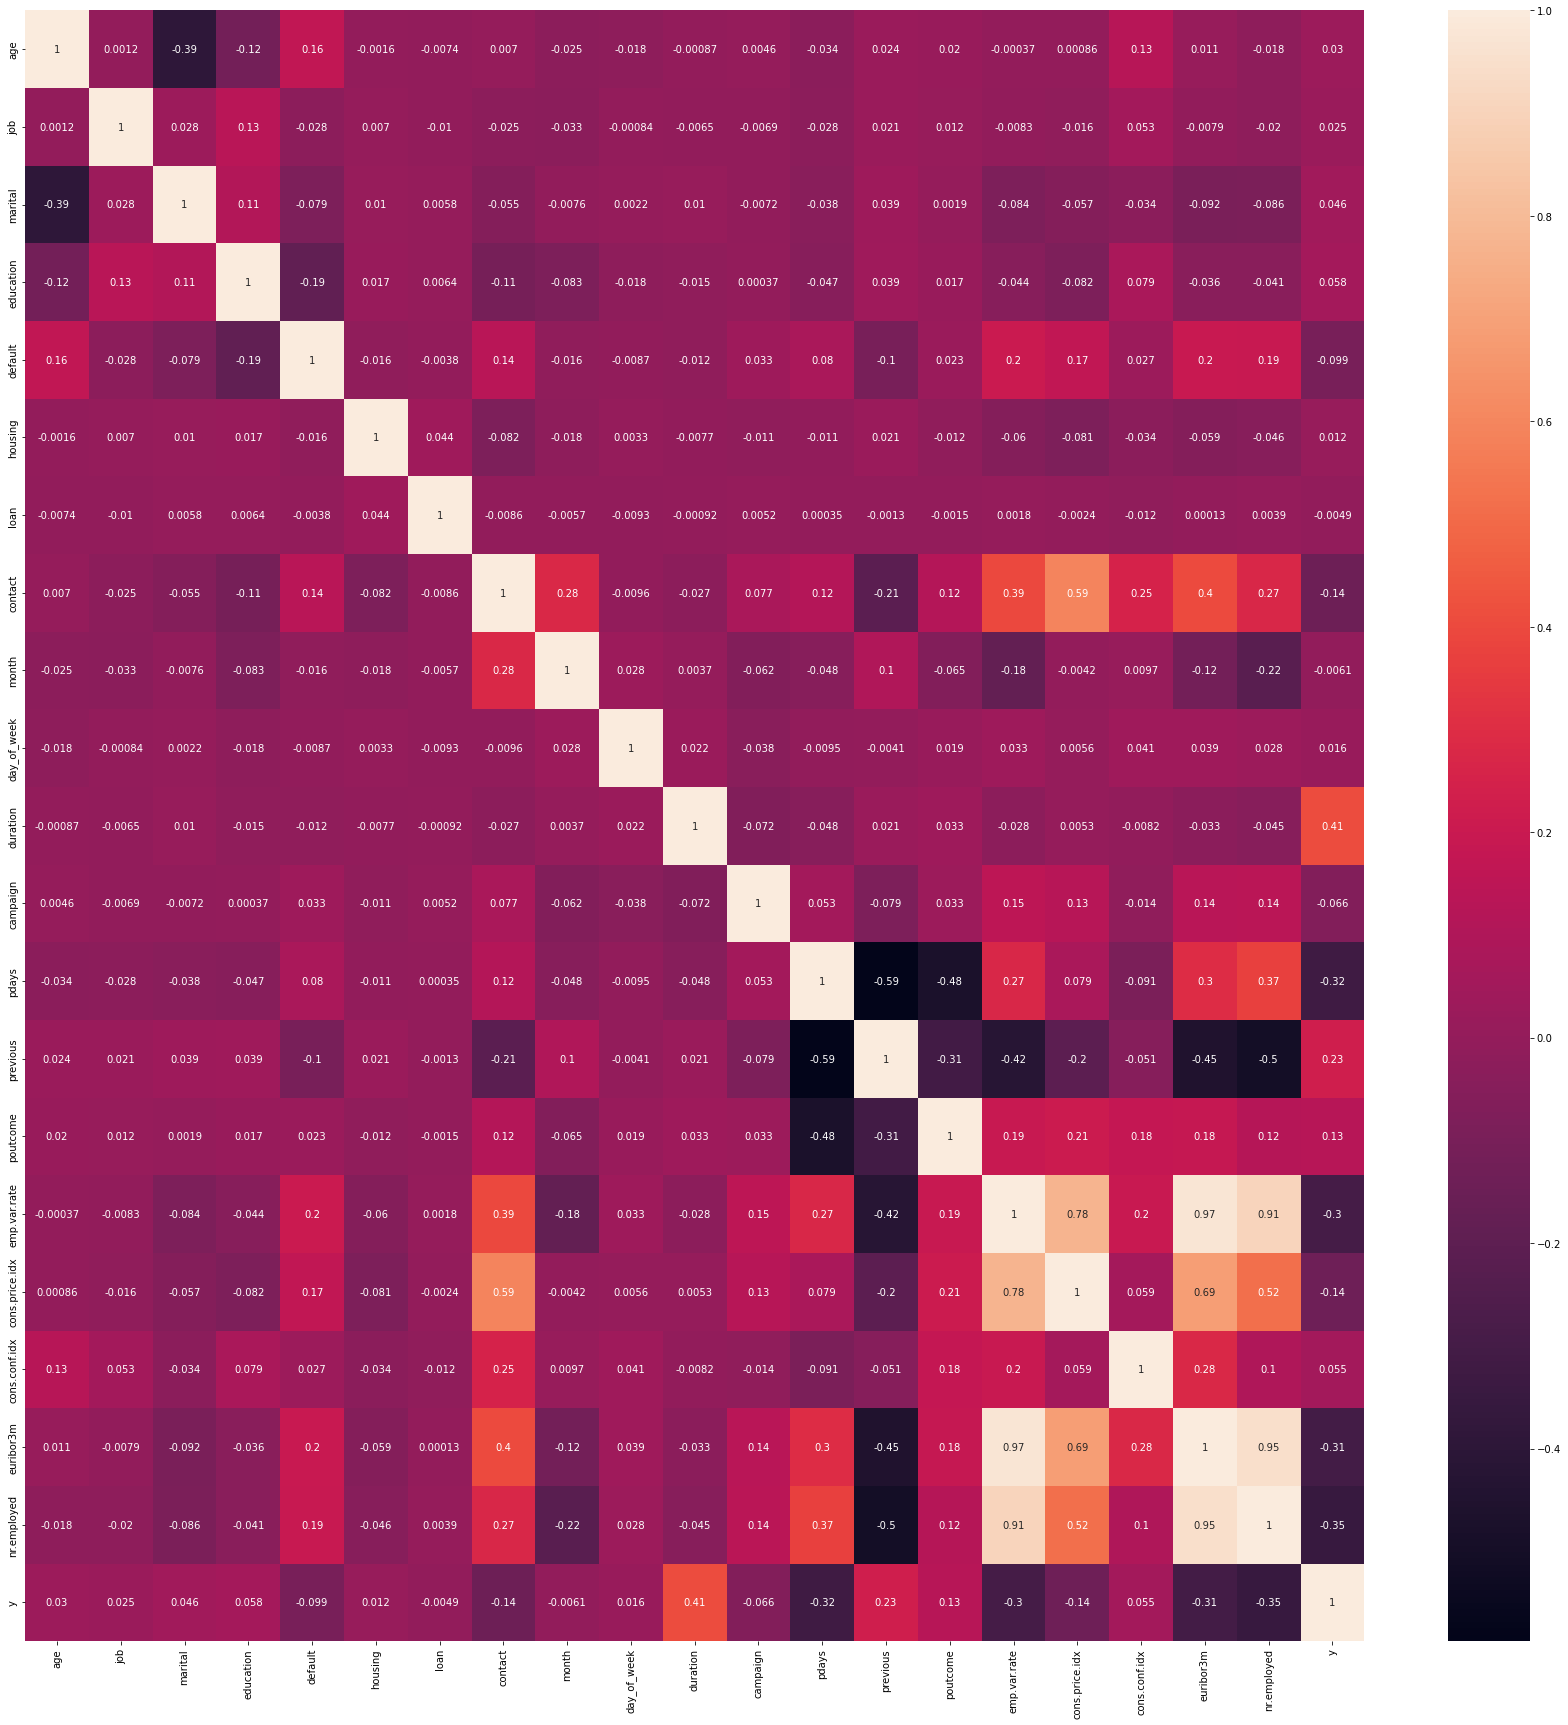

In [16]:
# Visualization of data correlation using heatmap after encoding
plt.figure(figsize=(30,30))
sns.heatmap(df_encoded.corr(),annot=True)

In [17]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int32  
 2   marital         41188 non-null  int32  
 3   education       41188 non-null  int32  
 4   default         41188 non-null  int32  
 5   housing         41188 non-null  int32  
 6   loan            41188 non-null  int32  
 7   contact         41188 non-null  int32  
 8   month           41188 non-null  int32  
 9   day_of_week     41188 non-null  int32  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int32  
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [18]:
# Checking for Unique Values in the dataset
for col in df_encoded.columns:
    print(col,'=',df_encoded[col].nunique())

age = 78
job = 12
marital = 4
education = 8
default = 3
housing = 3
loan = 3
contact = 2
month = 10
day_of_week = 5
duration = 1544
campaign = 42
pdays = 27
previous = 8
poutcome = 3
emp.var.rate = 10
cons.price.idx = 26
cons.conf.idx = 26
euribor3m = 316
nr.employed = 11
y = 2


In [19]:
df_encoded.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

# Data Spliting:

In [20]:
# Seperating Independent and Dependent Variables
x=df_encoded.drop(labels=['y'],axis=1)
y=df_encoded[['y']]

In [21]:
# Seperating Training and Testing Data for Model Building
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.3)

# Task Q2.c. Selecting important features based on Random Forest:

In [22]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(x_train, y_train)

C:\Users\praneshkumar\anaconda3\lib\site-packages\sklearn\feature_selection\_from_model.py:351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


SelectFromModel(estimator=RandomForestClassifier())

In [23]:
sel.get_support()

array([ True, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True,  True])

In [24]:
selected_feat= x_train.columns[(sel.get_support())]
len(selected_feat)

4

In [25]:
print(selected_feat)

Index(['age', 'duration', 'euribor3m', 'nr.employed'], dtype='object')


In [26]:
df=df_encoded[['age', 'duration', 'euribor3m', 'nr.employed','y']].copy()

In [27]:
df

,age,duration,euribor3m,nr.employed,y
0,56,261,4.857,5191.0,0
1,57,149,4.857,5191.0,0
2,37,226,4.857,5191.0,0
3,40,151,4.857,5191.0,0
4,56,307,4.857,5191.0,0
...,...,...,...,...,...
41183,73,334,1.028,4963.6,1
41184,46,383,1.028,4963.6,0
41185,56,189,1.028,4963.6,0
41186,44,442,1.028,4963.6,1


# Selection of important columns have been done using Random Forest

# Data Spliting:

In [28]:
# Seperating Independent and Dependent Variables
x=df.drop(labels=['y'],axis=1)
y=df[['y']]

In [29]:
# Seperating Training and Testing Data for Model Building
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.3)

# Task Q2.d. Handling unbalanced data using SMOTE

In [30]:
# Checking the uniformity of the data
y_train.value_counts()

y
0    25609
1     3222
dtype: int64

# The data is not Balanced.

In [31]:
smote = SMOTE()
x_train, y_train = smote.fit_resample(x_train, y_train)

In [32]:
y_train.value_counts()

y
0    25609
1    25609
dtype: int64

# The Unbalanced data is handled using SMOTE.

# Task Q2.e. Standardize the data using the anyone of the scalers provided by sklearn

In [33]:
# Building the Scaler 
sc = StandardScaler()
# Scaling Train Dataset
x_train = sc.fit_transform(x_train)
# Scaling Test Dataset
x_test = sc.transform(x_test)

# Standardized the data using the Standard Scaler provided by sklearn.

# Task Q3. Build the following Supervised Learning models:

### Q3.a. Logistic Regressor Model:

In [34]:
# Random Forest Model Build
lr = LogisticRegression()
# Model Fitting
lr.fit(x_train, y_train)

C:\Users\praneshkumar\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [35]:
# Accuracy Testing
lrtr=lr.score(x_train,y_train)
print('Train Score:',lrtr)
lrte=lr.score(x_test,y_test)
print('Test Score: ',lrte)

Train Score: 0.842223437072904
Test Score:  0.8336974993930566


### This model seems to be a Decent one, we can try with other models.

### Q3.b. AdaBoost Classifier Model:

In [36]:
# AdaBoost Classifier Model Build
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)
# Model Fitting
abc.fit(x_train, y_train)

C:\Users\praneshkumar\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(learning_rate=1)

In [37]:
# Accuracy Testing
abctr=abc.score(x_train,y_train)
print('Train Score:',abctr)
abcte=abc.score(x_test,y_test)
print('Test Score: ',abcte)

Train Score: 0.8734624546058026
Test Score:  0.860403010439427


### This model also seems to be a Decent one, we can try with other models.

### Q3.c. Gaussian Naive Bayes Model:

In [38]:
# Gaussian Naive Bayes Model
gnb = GaussianNB()
# Model Fitting
gnb.fit(x_train, y_train)

C:\Users\praneshkumar\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [39]:
# Accuracy Testing
gnbtr=gnb.score(x_train,y_train)
print('Train Score:',gnbtr)
gnbte=gnb.score(x_test,y_test)
print('Test Score: ',gnbte)

Train Score: 0.7871451442852122
Test Score:  0.72784656470017


### This model also seems to less fitting one when compared to other models, we can try with other models.

### Q3.d. K Nearest Neighbour's Classifier Model:

In [40]:
# K Nearest Neighbour's Classifier Model
knnc = KNeighborsClassifier(n_neighbors=25)
# Model Fitting
knnc.fit(x_train, y_train)

C:\Users\praneshkumar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=25)

In [41]:
# Accuracy Testing
knnctr=knnc.score(x_train,y_train)
print('Train Score:',knnctr)
knncte=knnc.score(x_test,y_test)
print('Test Score: ',knncte)

Train Score: 0.8900777070561131
Test Score:  0.8427611879906126


### This model seems to be slightly over fitting one , we can try with other models.

### Q3.e. Support Vector Classifier Model:

In [42]:
# Support Vector Classifier Model
svc = SVC()
# Model Fitting
svc.fit(x_train, y_train)

C:\Users\praneshkumar\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [43]:
# Accuracy Testing
svctr=svc.score(x_train,y_train)
print('Train Score:',svctr)
svcte=svc.score(x_test,y_test)
print('Test Score: ',svcte)

Train Score: 0.8698309188176032
Test Score:  0.8288419519300801


### This model seems to be slightly over fitting one , we can proceed to Conclusion segment.

# Task Q4. Tabulate the performance metrics of all the above models and tell which model performs better in predicting if the client will subscribe to term deposit or not:

# Conclusion:

In [44]:
print('Logistic Regressor Model:')
print('Train Score:',lrtr)
print('Test Score: ',lrte)
print('AdaBoost Classifier Model:')
print('Train Score:',abctr)
print('Test Score: ',abcte)
print('Gaussian Naive Bayes Model:')
print('Train Score:',gnbtr)
print('Test Score: ',gnbte)
print("K Nearest Neighbour's Classifier Model:")
print('Train Score:',knnctr)
print('Test Score: ',knncte)
print('Support Vector Classifier Model:')
print('Train Score:',svctr)
print('Test Score: ',svcte)

Logistic Regressor Model:
Train Score: 0.842223437072904
Test Score:  0.8336974993930566
AdaBoost Classifier Model:
Train Score: 0.8734624546058026
Test Score:  0.860403010439427
Gaussian Naive Bayes Model:
Train Score: 0.7871451442852122
Test Score:  0.72784656470017
K Nearest Neighbour's Classifier Model:
Train Score: 0.8900777070561131
Test Score:  0.8427611879906126
Support Vector Classifier Model:
Train Score: 0.8698309188176032
Test Score:  0.8288419519300801


In [45]:
# Application of all Machine Learning methods
MLA = [lr,abc,gnb,knnc,svc]

In [46]:
# Printing the table
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:  
    
    predicted = alg.fit(x_train, y_train).predict(x_test)
    fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA used'] = MLA_name
    MLA_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(x_train, y_train), 4)
    MLA_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(x_test, y_test), 4)
    MLA_compare.loc[row_index, 'Precission'] = precision_score(y_test, predicted)
    MLA_compare.loc[row_index, 'Recall'] = recall_score(y_test, predicted)
    MLA_compare.loc[row_index, 'AUC'] = auc(fp, tp)
    row_index+=1
MLA_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
MLA_compare

C:\Users\praneshkumar\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\praneshkumar\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\praneshkumar\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\praneshkumar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

,MLA used,Train Accuracy,Test Accuracy,Precission,Recall,AUC
1,AdaBoostClassifier,0.8735,0.8604,0.443504,0.849788,0.855784
3,KNeighborsClassifier,0.8901,0.8428,0.413850,0.889281,0.863006
0,LogisticRegression,0.8422,0.8337,0.392797,0.822990,0.829038
4,SVC,0.8698,0.8288,0.393458,0.907616,0.863123
2,GaussianNB,0.7871,0.7278,0.277205,0.853315,0.782448


# Conclusion:
## All the models seems to have some imperfections; but AdaBoost Classifier Model seems to be promising.

# Part I Completed